
# Project Name: Football Transfer Market Analysis

# Name of the team : The Eagles

# Students name, roles and E-mail:
### 1-Abdullah Khalid Alsudayri \ Leader \ Data analyst \ searcher \ 437100514@student.edu.ksu.sa
### 2-Yazeed Mohammed Alsuhaibani \ Data analyst \ searcher \ 437101778@student.edu.ksu.sa

# Table of contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

### Through the data, we want to overview the transfer market and get a general idea of the data. We aim to analyze the data and review some information about it.
### We are grateful for allowing us to choose a topic and not be bound by something specific because of our love for football. And our attention to detail. We thought of a project that would be useful and at the same time enjoyable. We have a wide background in football, but for the first time we are analyzing data related to it.
### We will analyze player transfer data from 2000 to 2018, and we aim to find out Which club is the most profitable also a knowledge of the approximate age of maturity of a player especially, there is a great need for a job as a data analyst in Saudi Arabia. Most of the clubs hire a full technical staff, and the attention is greater for the coach. Data analyst job is important for someone who lives in Saudi Arabia for the best result.
### After the global trend to hire a data analyst in clubs. And watch the results and success on the ground. In the future, Saudi clubs are expected to be interested in hiring a data analyst.

First of all, we need to install some packages to run our code: \
 1-pandas \
 2-numpy \
 3-matplotlib  \
 4-seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

<a id='wrangling'></a>
# Data Wrangling


## General Properties



In [2]:
df = pd.read_csv('top250-00-19.csv')

We get this data from kaggle website --> https://www.kaggle.com/vardan95ghazaryan/top-250-football-transfers-from-2000-to-2018 \
also, our dataset is table.

In [3]:
df.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000


### The our dataset contains:
1-Name: the name of a football plyer. \
2-position: playing position example (Right Winger, Centre-Forward and Centre-Back ). \
3-Age: Age by the time of a transfer. \
4-Team_from: Team that sold a player to another. \
5-Team_to: Team, where a player was sold. \
6-League_to: the League, where a player was sold to. \
7-League_from: the league which of selling team. \
8-Season: Football season, when the transfer took place. \
9-Market_value: Estimated market value of each player in the team. \
10-Transfer_fee: Actual value of transfer.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4700 non-null   object 
 1   Position      4700 non-null   object 
 2   Age           4700 non-null   int64  
 3   Team_from     4700 non-null   object 
 4   League_from   4700 non-null   object 
 5   Team_to       4700 non-null   object 
 6   League_to     4700 non-null   object 
 7   Season        4700 non-null   object 
 8   Market_value  3440 non-null   float64
 9   Transfer_fee  4700 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 367.3+ KB


We can see in the Market_value column some rows missing data and it just has 3440 row out of 4700 rows, so we want to drop the column, also we don't need it.

In [5]:
df.drop(axis=1, labels=['Market_value'], inplace=True)

Now we will check.

In [6]:
df.head(1)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,60000000


Done

In [7]:
df.describe()

,Age,Transfer_fee
count,4700.000000,4.700000e+03
mean,24.338723,9.447586e+06
std,3.230809,1.043772e+07
min,0.000000,8.250000e+05
25%,22.000000,4.000000e+06
50%,24.000000,6.500000e+06
75%,27.000000,1.082000e+07
max,35.000000,2.220000e+08


Here we can see in the minimum age it is zero and that not make sense, so we have to drop this row

In [8]:
df.query('Age == 0')

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Transfer_fee
236,Marzouq Al-Otaibi,Centre-Forward,0,Shabab,Saudi Arabia,Ittihad,Saudi Arabia,2000-2001,2000000


In [9]:
df.drop([236], inplace=True)

So here we deleted the row (236) 

In [10]:
df.describe()

,Age,Transfer_fee
count,4699.000000,4.699000e+03
mean,24.343903,9.449171e+06
std,3.211578,1.043826e+07
min,15.000000,8.250000e+05
25%,22.000000,4.000000e+06
50%,24.000000,6.500000e+06
75%,27.000000,1.082000e+07
max,35.000000,2.220000e+08


And here we can check again.

Here we will check if we have any duplicate value.

In [11]:
df.duplicated().sum()

0

That's good we don't have any duplicate values.

Finally. In our dataset we have a position column, in this column we have a lot of position in detail for example in the defender position we have about four-position like Right-back and Centre-back, etc. So we want to collect them in one position to make it easier for us to analyze it.

In [12]:
position_group = {'Right Winger': 'Attacker','Centre-Forward':'Attacker','Left Winger':'Attacker','Centre-Back':'Defender','Central Midfield':
               'Midfield','Attacking Midfield': 'Midfield', 'Defensive Midfield': 'Midfield','Second Striker': 'Attacker', 'Goalkeeper': 'Goalkeeper',
               'Right-Back':'Defender','Left Midfield': 'Midfield', 'Left-Back':'Defender','Right Midfield':'Midfield','Forward':'Attacker','Sweeper':'Midfield',
               'Defender':'Defender','Midfielder':'Midfield'}

In [13]:
df['New_position'] = pd.Series(df.Position.map(position_group), index = df.index)

Here we create a new column with name New_position.

In [14]:
df.head(1)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Transfer_fee,New_position
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,60000000,Attacker


Here we can see the new column.

Now we want to drop the Position column because we don't need it.

In [15]:
df.drop(axis=1, labels=['Position'], inplace=True)

In [16]:
df.head(1)

,Name,Age,Team_from,League_from,Team_to,League_to,Season,Transfer_fee,New_position
0,Luís Figo,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,60000000,Attacker


Done

<a id='eda'></a>
# Exploratory Data Analysis



## First analysis \ We will analyze the profit for each team, to know who the highest profit teams, and how to make it 

We want to collect the players' selling prices for each team.

In [17]:
team_from_sum = df.groupby(['Team_from'])['Transfer_fee'].sum()
team_from_sum

Team_from
1. FC Köln         88600000
1.FC K'lautern     18100000
1.FC Nuremberg     47100000
1.FSV Mainz 05    140900000
1860 Munich        13650000
                    ...    
Zenit S-Pb        206300000
Zorya Lugansk       8500000
Zulte Waregem       8000000
Örgryte             7230000
Östers IF           1500000
Name: Transfer_fee, Length: 570, dtype: int64

And here we will collect the players' buying prices for each team.

In [18]:
team_to_sum = df.groupby(['Team_to'])['Transfer_fee'].sum()
team_to_sum

Team_to
1. FC Köln         41500000
1.FC K'lautern     14300000
1.FSV Mainz 05     35800000
1860 Munich         5575000
AC Milan          941350000
                    ...    
West Brom         237220000
West Ham          516090000
Wigan             106500000
Wolves            154700000
Zenit S-Pb        418000000
Name: Transfer_fee, Length: 325, dtype: int64

Now we will calculate the profits and sorting the values.

In [19]:
diff_team = team_from_sum - team_to_sum
diff_team = diff_team.sort_values(ascending=False)
#We divide diff_team here to be the prices in the millions
diff_team = diff_team/1000000
diff_team.head()

FC Porto          556.74
Benfica           451.05
Udinese Calcio    342.50
River Plate       324.63
Parma             263.79
Name: Transfer_fee, dtype: float64

Now we will arrange our data from top to bottom. And we only need the first 10 rows.

In [20]:
make_money = diff_team.sort_values(ascending=False)[:10]
#print the difference between buying and selling
print(make_money)

FC Porto          556.74
Benfica           451.05
Udinese Calcio    342.50
River Plate       324.63
Parma             263.79
Monaco            262.56
AFC Ajax          245.33
Santos FC         245.00
LOSC Lille        220.44
Sporting CP       209.25
Name: Transfer_fee, dtype: float64


Then we will visualize the data

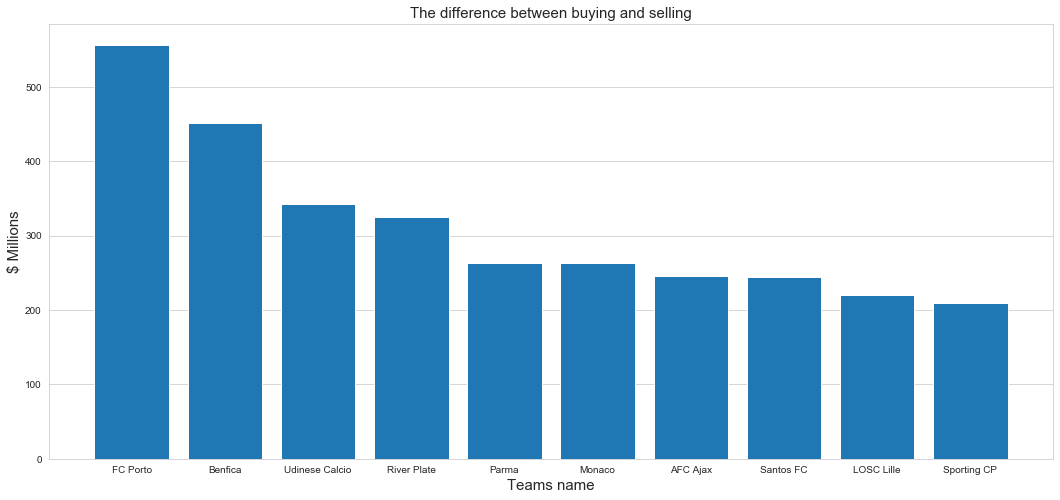

In [21]:
fig, ax = plt.subplots(figsize=(18,8))
ax.bar(make_money.index, make_money.values)
ax.set_title("The difference between buying and selling", fontsize=15)
ax.set_ylabel("$ Millions", fontsize=15)
ax.set_xlabel("Teams name", fontsize=15)
ax.set_xticklabels(make_money.index)
plt.grid(axis='x')

# Observation
 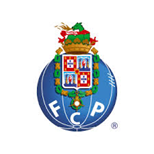
#### Certainly, the profits of this size do not come without planning, the Porto team is interested in the marketing part also to be a competing club.  Porto won the European Champions League in 2004, which made the team one of the top clubs. And contributed to highlighting a number of players.
#### Porto makes all of this from sports marketing, its scouts spread throughout the world, and they rely on the idea that young talents find it very difficult to move to a global team to show their talents, Porto opens this way for them.

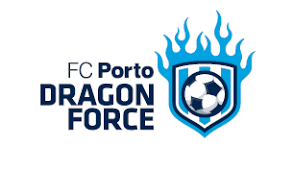

#### Porto appeared a special project for the club's academy as “Dragon Force” the opening of the Dragon Force project was on 06/09/2008. The academy has a very encouraging title which is “Preparing champions for life”, the project targets ages from 4 to 14 years. Unlike other clubs, which mostly cater for players over 18 years old.
#### Porto club for the young teams consists of 25% of the results of this project, which indicates that the project is very successful. Player training from a young age is one of the most important components of professional players. This is what benefits the club with efficient players.
#### The club is interested in three main areas of support: education, psychology and health, which is also an incentive for parents to allow their children to play football, After the age of 14, players are evaluated and then a group are selected to be registered in the club's lists for the young teams.
#### The club is not satisfied with the academy only, Also the club has 250 scouts around the world. Which is far too many compared to other big clubs, for example Manchester United has only 58 Scouts.
#### Porto club proves that allocating a budget to the academy means double financial gains in the future and a rival club as well, Porto in this period achieved 12 leagues and 1 European Champions League. 
#### A very fruitful strategy that also requires patience and effort. According to the statistic, out of 20 players will be registered in Dragon Force. Only 5 are attracted to the Sunni groups. 

## Second analysis \ We will analyze counts for each position and why.

The total number of players in each position:

In [22]:
each_position_group = df.New_position.value_counts()
#print numbers for each position
print(each_position_group)

Attacker      1922
Midfield      1476
Defender      1121
Goalkeeper     180
Name: New_position, dtype: int64


Now we will visualize the data

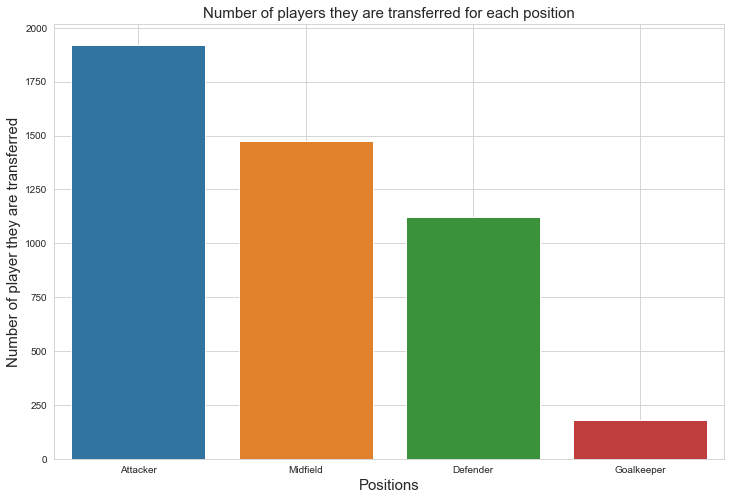

In [23]:
ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(each_position_group.index, each_position_group.values)
ax.set_title("Number of players they are transferred for each position", fontsize=15)
ax.set_ylabel("Number of player they are transferred",fontsize=15)
ax.set_xlabel("Positions", fontsize=15)
plt.grid(axis='x')

(0, 50000000)

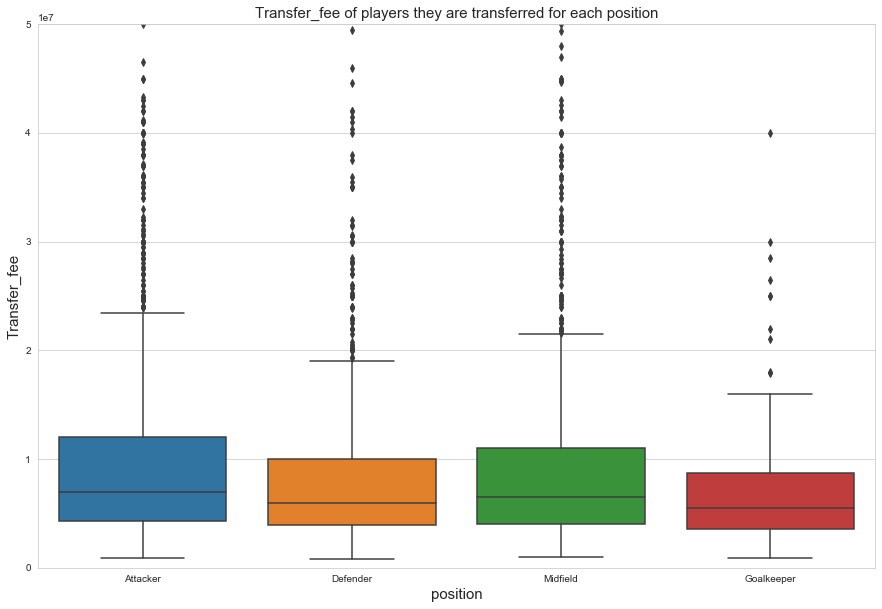

In [24]:
ax = plt.subplots(figsize=(15,10))
ax = sns.boxplot(x="New_position", y="Transfer_fee", data=df)
ax.set_title("Transfer_fee of players they are transferred for each position", fontsize=15)
ax.set_ylabel("Transfer_fee",fontsize=15)
ax.set_xlabel("position", fontsize=15)
ax.set_ylim([0, 50000000])

# Observation
#### According to the diagram, we find that the most transfers are for the attackers. The reason is due to several reasons, including that most fans and the media are interested in who scores the most goals. Defenders are even deemed better players if they can add a couple of goals or assists to their season. If the team does not score the required number of goals, they start to search for new attackers. Also, the attackers are often assigned the reason for winning even though the team has 11 players.
#### If you buy a striker, you earn extra profit. Most of the companies like Nike, Adidas, and Puma. They prefer hiring an attacker to be the representative of the advertising company. This means that the attackers will benefit more than others
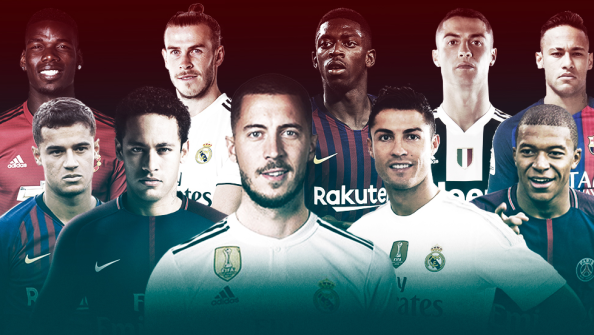


## Thierd analysis \ Does the player's age effect the transfer chances?

Now we will divide the players for each age

In [25]:
each_age = df.Age.value_counts()
each_age

24    536
25    524
23    519
26    481
22    461
27    404
21    371
28    327
20    302
29    223
19    165
30    157
18     82
31     59
32     30
17     23
33     15
16     10
34      5
35      4
15      1
Name: Age, dtype: int64

Text(0.5, 0, 'Age')

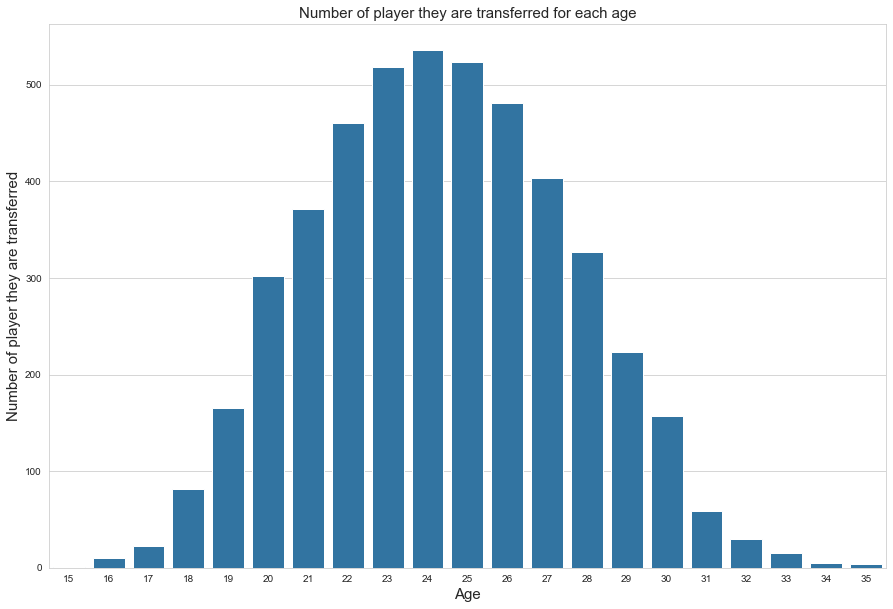

In [26]:
ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(each_age.index, each_age.values, color=sns.color_palette()[0])
ax.set_title("Number of player they are transferred for each age", fontsize=15)
ax.set_ylabel("Number of player they are transferred",fontsize=15)
ax.set_xlabel("Age", fontsize=15)

Here we want to see what age is the most transferred for each season

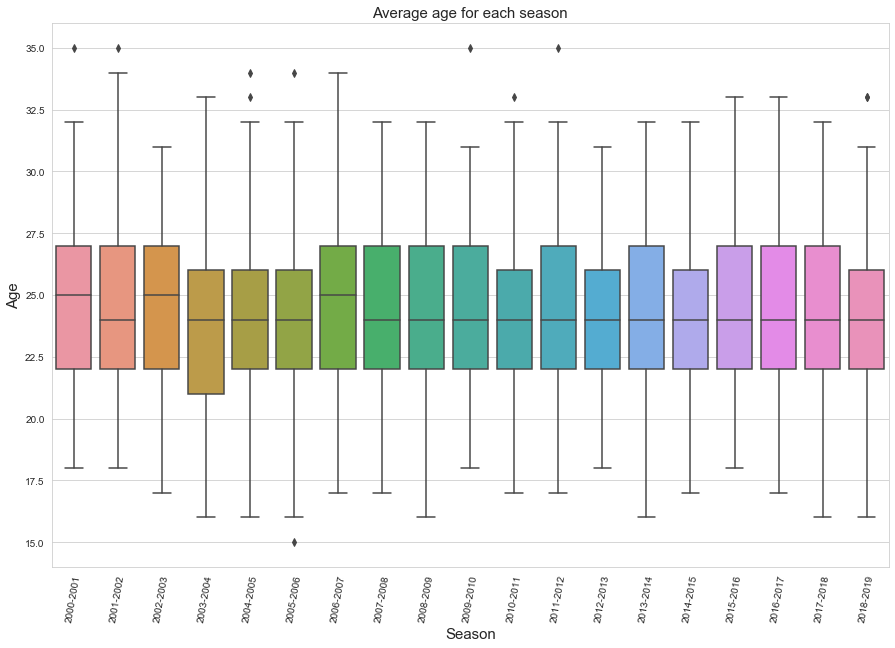

In [32]:
ax = plt.subplots(figsize=(15,10))
ax = sns.boxplot(x="Season", y="Age", data=df)
ax.set_title("Average age for each season", fontsize=15)
ax.set_ylabel("Age",fontsize=15)
ax.set_xlabel("Season", fontsize=15)
ax = plt.xticks(rotation=80)

# Observation
#### From the graphs, we can see the most transferring players between the age of 22 to approximately 27, and the reason for this is that the player almost matures between the ages of 24 to 27 also to play many matches, these polishes his talent and self-confidence. The player become at his peak and is also ready to take responsibility. So the clubs are keen and compete to buy them. 
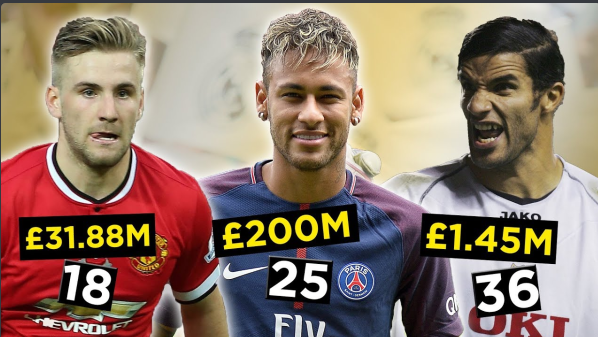

## forth analysis \ Observing the top leagues that attract most players.

In [28]:
cols = ['League_from', 'League_to']
transfers = df[df[cols[0]] != df[cols[1]]]
transfers = transfers[cols]
transfers.head()

,League_from,League_to
2,Premier League,LaLiga
4,LaLiga,Ligue 1
7,LaLiga,Serie A
8,Ligue 1,Serie A
9,LaLiga,Serie A


In [29]:
data = transfers.groupby('League_to').count()

In [30]:
top10 = data.sort_values(ascending=False, by  = 'League_from')
top10[:10]

,League_from
League_to,
Premier League,882
Serie A,380
LaLiga,378
1.Bundesliga,286
Premier Liga,252
Ligue 1,238
Liga NOS,108
Süper Lig,104
Super League,92


Text(0, 0.5, 'Number of Transfers')

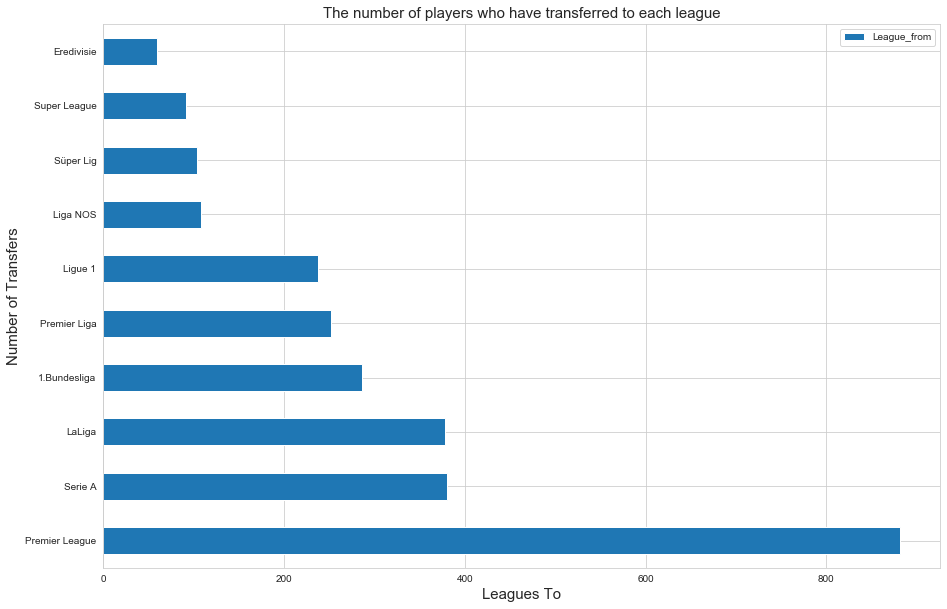

In [31]:
ax = top10[:10].plot.barh(figsize=(15,10))
ax.set_title("The number of players who have transferred to each league", fontsize=15)
ax.set_xlabel("Leagues To",fontsize=15)
ax.set_ylabel("Number of Transfers",fontsize=15)

## Why does the Premier League have the most number of players transferred to it?
#### Here are the ten league which spent the highest amount in 2018 summer transfer: 
#### 1)Premier League – £1.26billion 
#### 2) Serie A – £686.47million 
#### 3) Ligue 1 – £385.67millio 
#### 4) La Liga – £365.94million 
#### 5) Bundesliga – £290.43million 
#### 6) Portuguese Liga NOS – £131.61million 
#### 7) Russian Premier Liga – £106.02million 
#### 8) Eredivisie – £65.93million 
#### 9) Jupiler Pro League – £54.46million 
#### 10) Turkish Super Lig – £29.92million 
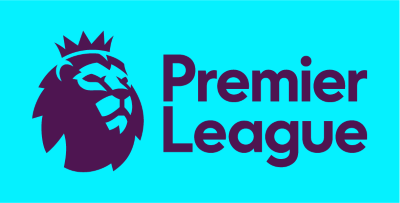
#### In Premier League They spent almost double on players than any other league in Europe £1.26million outlay was the lowest of any summer since 2015. Indeed, this year’s spend is down £350million compared to last summer. But it was still around equal to Ligue1, La Liga, Bundesliga, Liga NOS and Premier Liga combined
#### So basically the more you spend money the more players come.

#### The competitive in the Premier League and Serie A specially attract the players from all the world in contrast to some European league that are dominated by tow or three clubs.
#### And of course Media power play a big role in the reasons why players come to this league  


<a id='conclusions'></a>

# Conclusions
#### In the end, we want to thank Dr. Mohammed for this project because it was very useful and interesting (Python language and data analysis).
#### We had some challenges first one from where took a dataset and which one is good for us, second, some visualize we didn't know how to write like boxplot, also we didn't know how to take two columns from our dataset and one of it be (group by) we took some days to know how to write this code, and because of Covid-19, and banning gatherings to maintain safety. We had to work on the project online, which caused some problems such as poor communication and lack of agreement on a specific time suitable for everyone, and the project took longer than planned.
#### In this project, we learned how to use Jupyter notebook and Python libraries.
#### We also enjoyed this project so much, we find the benefit even in our personal lives. In our conversation with friends, we presented the results of the analysis, and we talked about it together. It feels great when you combine the hobby with your study interest. That even some of us want to be data analysts of the future.
## References:
#### 1- https://matplotlib.org/3.3.2/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py
#### 2- https://www.geeksforgeeks.org/python-filtering-data-with-pandas-query-method/
#### 3- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
#### 4- https://stackoverflow.com/questions/12555323/adding-new-column-to-existing-dataframe-in-python-pandas
#### 5- https://www.fcporto.pt/en/dragon-force/o-projeto
#### 6- https://stackoverflow.com/questions/18500011/horizontal-box-plots-in-matplotlib-pandas
#### 7- https://seaborn.pydata.org/generated/seaborn.violinplot.html
#### 8- https://seaborn.pydata.org/generated/seaborn.boxplot.html
#### 9- https://seaborn.pydata.org/generated/seaborn.set_style.html